In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_csv('/content/Student Mental health.csv')

In [8]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Changing the column names for our benefits

In [9]:
new_columns = ['Time','Gender','Age','Major','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns = new_columns
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [10]:
# To see total rows and columns
df.shape

(101, 11)

In [11]:
# To see the complete information of the csv file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        101 non-null    object 
 1   Gender      101 non-null    object 
 2   Age         100 non-null    float64
 3   Major       101 non-null    object 
 4   Year        101 non-null    object 
 5   CGPA        101 non-null    object 
 6   Marriage    101 non-null    object 
 7   Depression  101 non-null    object 
 8   Anxiety     101 non-null    object 
 9   Panic       101 non-null    object 
 10  Treatment   101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [12]:
# To see some statistical measures
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


As you can see here is one column because here Age is the only numerical column and other columns are objects.

In [13]:
df.duplicated().sum()

0

## Checking and Handling the Missing Values

In [14]:
df.isna().sum()

Time          0
Gender        0
Age           1
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [15]:
# remove the missing values
df.dropna(inplace=True)

In [16]:
df.isna().sum()

Time          0
Gender        0
Age           0
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

so our dataset is cleaned Finally.

## EDA - Explatory Data Analysis

Text(0, 0.5, 'Frequency')

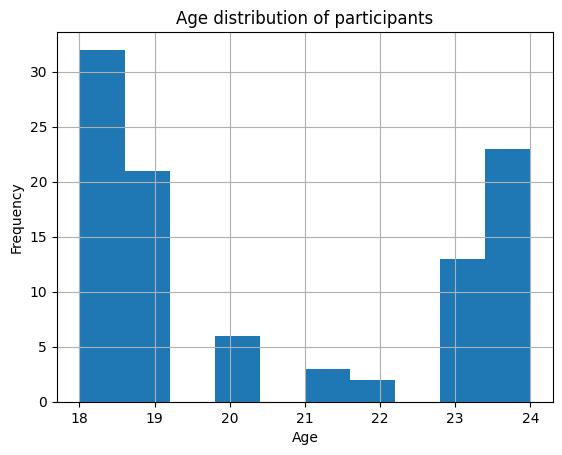

In [17]:
df['Age'].hist()

plt.title('Age distribution of participants')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Depression by Age')

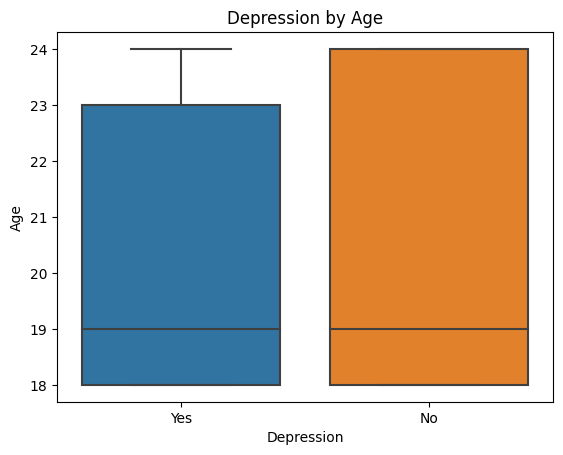

In [18]:
sn.boxplot(data=df, x='Depression', y='Age')

plt.title('Depression by Age')

Text(0.5, 1.0, 'CGPA distribution')

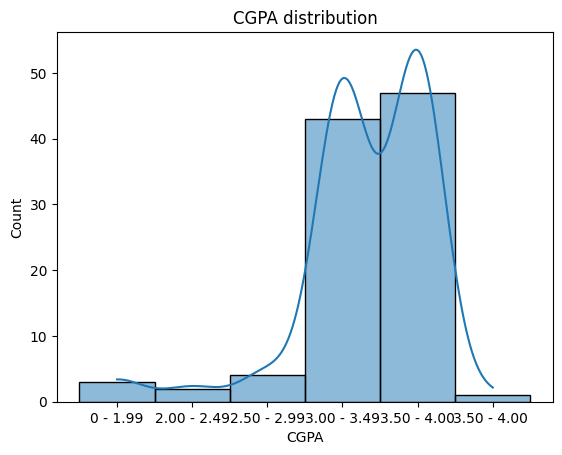

In [19]:
sn.histplot(df['CGPA'].sort_values(), kde=True)

plt.title('CGPA distribution')

Text(0.5, 1.0, 'Depression frequency')

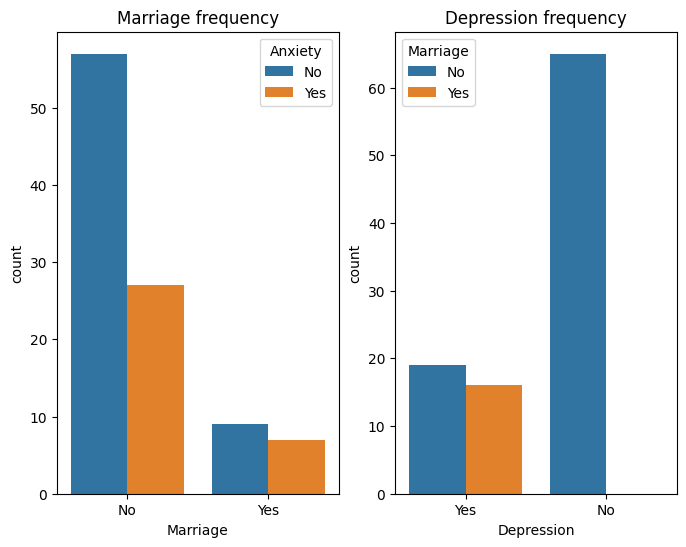

In [20]:
fig=plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
sn.countplot(data=df, x='Marriage', hue='Anxiety')
plt.title('Marriage frequency')

plt.subplot(1,2,2)
sn.countplot(data=df, x='Depression', hue='Marriage')
plt.title("Depression frequency")

In [21]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Data Preprocessing

- Clean the data
- Turn categorial data into numerical data
- Normalize the data

In [22]:
# As you can see all 5 columns have binary values. So we have to deal with it first.

In [23]:
cols=['Marriage','Depression','Anxiety','Panic','Treatment']

def check(x):
  if x=='Yes':
    return 1
  else:
    return 0

for i in cols:
  df[i]=df[i].apply(lambda x:1 if x=='Yes' else 0)

In [24]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


Binary Text values are handled.

In [25]:
df['Year']=df['Year'].apply(lambda x : int(x[-1: ]))

df

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,0,0,0,0,0


In [26]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [27]:
df['CGPA'].value_counts().sort_values()

3.50 - 4.00      1
2.00 - 2.49      2
0 - 1.99         3
2.50 - 2.99      4
3.00 - 3.49     43
3.50 - 4.00     47
Name: CGPA, dtype: int64

In [28]:
def change_CGPA(x):
  if(x=='3.50 - 4.00') or (x=='3.50 - 4.00'):
    x=5
    return x

  elif (x=='3.00 - 3.49'):
    x=4
    return x

  elif (x=='2.50 - 2.99'):
    x=3
    return x

  elif(x=='2.00 - 2.49'):
    x=2
    return x

  else:
    x=1
    return x

df['CGPA']=df['CGPA'].apply(lambda x : change_CGPA(x))

In [29]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,4,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,4,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,4,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,4,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,4,0,0,0,0,0


CGPA column is handled

Gender

In [30]:
df['Gender']=df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [31]:
df['Gender'].unique()

array([0, 1])

### Now we have to handle with Major Column

In [32]:
df['Major'].sort_values().unique()

array(['ALA', 'Accounting ', 'BCS', 'BENL', 'BIT', 'Banking Studies',
       'Benl', 'Biomedical science', 'Biotechnology',
       'Business Administration', 'CTS', 'Communication ', 'DIPLOMA TESL',
       'Diploma Nursing', 'ENM', 'Econs', 'Engine', 'Engineering', 'Fiqh',
       'Fiqh fatwa ', 'Human Resources', 'Human Sciences ', 'IT', 'Irkhs',
       'Islamic Education', 'Islamic education', 'KENMS', 'KIRKHS', 'KOE',
       'Kirkhs', 'Koe', 'Kop', 'Law', 'Laws', 'MHSC', 'Malcom',
       'Marine science', 'Mathemathics', 'Nursing ', 'Pendidikan Islam',
       'Pendidikan Islam ', 'Pendidikan islam', 'Psychology',
       'Radiography', 'TAASL', 'Usuluddin ', 'engin', 'koe', 'psychology'],
      dtype=object)

In [33]:
le=LabelEncoder()

df['Major']=le.fit_transform(df['Major'])

In [34]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,0,18.0,17,1,4,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,25,2,4,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,1,4,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,33,3,4,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,37,4,4,0,0,0,0,0


In [35]:
## We dont need time column, so we just have to drop it.

In [36]:
df.drop('Time',axis=1,inplace=True)

In [37]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,1,0,1,0
1,1,21.0,25,2,4,0,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,33,3,4,1,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0,0


#### So our Data pre-processing is done

In [38]:
df

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,1,0,1,0
1,1,21.0,25,2,4,0,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,33,3,4,1,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,5,0,0,1,0,0
97,1,18.0,17,2,4,0,1,1,0,0
98,0,19.0,38,3,5,1,1,0,1,0
99,0,23.0,39,4,5,0,0,0,0,0


## Train Test Split

In [39]:
X=df.drop(columns='Depression', axis=1)
Y=df['Depression']

In [40]:
X

,Gender,Age,Major,Year,CGPA,Marriage,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,0,1,0
1,1,21.0,25,2,4,0,1,0,0
2,1,19.0,4,1,4,0,1,1,0
3,0,22.0,33,3,4,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,5,0,1,0,0
97,1,18.0,17,2,4,0,1,0,0
98,0,19.0,38,3,5,1,0,1,0
99,0,23.0,39,4,5,0,0,0,0


In [41]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
96     0
97     1
98     1
99     0
100    0
Name: Depression, Length: 100, dtype: int64

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(100, 9) (80, 9) (20, 9)


In [44]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100,) (80,) (20,)


## Model

In [45]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
x_train_pred=model.predict(X_train)
training_accuracy=accuracy_score(Y_train, x_train_pred)

print('Training Accuracy: ',training_accuracy)

Training Accuracy:  0.85


In [47]:
x_test_pred=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test, x_test_pred)

print('Training Accuracy: ',testing_accuracy)

Training Accuracy:  0.85


In [48]:
input_data = (	0,	19.0,	38,	3,	5,	1,	0,	1	,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Depressed')

else:
  print('Depressed')

[1]
Depressed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
input_data = (0	,21.0	,2	,1	,5	,0	,1	,0	,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Depressed')

else:
  print('Depressed')

[0]
Not Depressed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
model1=GaussianNB()
model1.fit(X_train,Y_train)

GaussianNB()

In [51]:
x_train_pred=model1.predict(X_train)
training_accuracy=accuracy_score(Y_train, x_train_pred)

print('Training Accuracy: ',training_accuracy)

Training Accuracy:  0.8125


In [52]:
x_test_pred=model1.predict(X_test)
testing_accuracy=accuracy_score(Y_test, x_test_pred)

print('Training Accuracy: ',testing_accuracy)

Training Accuracy:  0.9


In [53]:
input_data = (	0,	19.0,	38,	3,	5,	1,	0,	1	,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Depressed')

else:
  print('Depressed')

[1]
Depressed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [54]:
input_data = (0	,21.0	,2	,1	,5	,0	,1	,0	,0)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Not Depressed')

else:
  print('Depressed')

[0]
Not Depressed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [55]:
import pickle

In [56]:
filename='Depression_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [57]:
loaded_model=pickle.load(open('Depression_prediction.sav', 'rb'))

In [58]:
for column in X.columns:
  print(column)

Gender
Age
Major
Year
CGPA
Marriage
Anxiety
Panic
Treatment
